**Importing libraries and setting option for display**

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os
import matplotlib
%matplotlib inline

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']='#00000000'


**Downloading the dataset**


In [ ]:
od.download('https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package')

Skipping, found downloaded files in "./weather-dataset-rattle-package" (use force=True to force download)


In [ ]:
os.listdir('weather-dataset-rattle-package')

['weatherAUS.csv']

In [ ]:
raw_df=pd.read_csv('weather-dataset-rattle-package/weatherAUS.csv')

In [ ]:
raw_df.dropna(subset=['RainTomorrow'],inplace=True)

**Preparing the data for training**

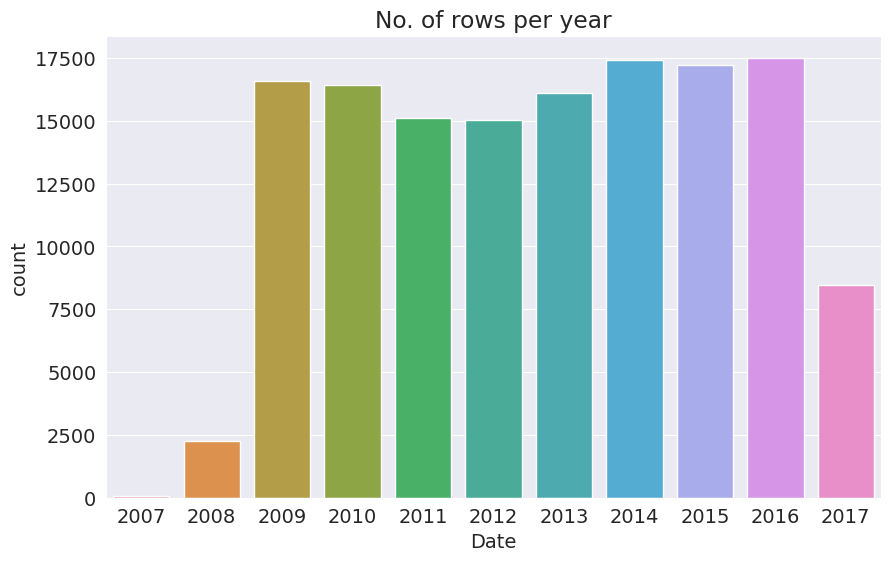

In [ ]:
plt.title('No. of rows per year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year);


In [ ]:
year= pd.to_datetime(raw_df.Date).dt.year

train_df=raw_df[year < 2015]
val_df=raw_df[year == 2015]
test_df=raw_df[year>2015]

In [ ]:
print('train_df.shape:',train_df.shape)
print('val_df.shape:',val_df.shape)
print('test_df.shape:',test_df.shape)

train_df.shape: (98988, 23)
val_df.shape: (17231, 23)
test_df.shape: (25974, 23)


**Input and target columns**

In [ ]:
input_cols=list(train_df.columns)[1:-1]
target_col='RainTomorrow'

In [ ]:
train_inputs=train_df[input_cols].copy()
train_targets=train_df[target_col].copy()


In [ ]:
val_inputs=val_df[input_cols].copy()
val_targets=val_df[target_col].copy()

In [ ]:
test_inputs=test_df[input_cols].copy()
test_targets=test_df[target_col].copy()

Identifying numeric and categorical columns

In [ ]:
numeric_cols=train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols=train_inputs.select_dtypes(include='object').columns.tolist()


Inputing missing numeric values

In [ ]:
train_inputs[numeric_cols].isna().sum().sort_values(ascending=False)

Sunshine         40696
Evaporation      37110
Cloud3pm         36766
Cloud9am         35764
Pressure9am       9345
Pressure3pm       9309
WindGustSpeed     6902
Humidity9am       1265
Humidity3pm       1186
WindSpeed3pm      1140
WindSpeed9am      1133
Rainfall          1000
Temp9am            783
Temp3pm            663
MinTemp            434
MaxTemp            198
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer=SimpleImputer(strategy='mean').fit(raw_df[numeric_cols])

In [ ]:
train_inputs[numeric_cols]=imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]=imputer.transform(test_inputs[numeric_cols])

In [ ]:
train_inputs[numeric_cols].isna().sum().sort_values(ascending=False)

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

Scaling numeric features

In [ ]:
val_inputs.describe().loc[['min','max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,-8.2,-3.2,0.0,0.0,0.0,7.0,0.0,0.0,4.0,0.0,988.1,982.2,0.0,0.0,-6.2,-4.0
max,31.9,45.4,247.2,70.4,14.5,135.0,87.0,74.0,100.0,100.0,1039.3,1037.3,8.0,8.0,37.5,42.8


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler().fit(raw_df[numeric_cols])

In [ ]:
train_inputs[numeric_cols]=scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]=scaler.transform(test_inputs[numeric_cols])

In [ ]:
val_inputs.describe().loc[['min','max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,0.007075,0.030246,0.000000,0.000000,0.0,0.007752,0.000000,0.000000,0.04,0.0,0.125620,0.0816,0.000000,0.000000,0.021097,0.026871
max,0.952830,0.948960,0.666307,0.485517,1.0,1.000000,0.669231,0.850575,1.00,1.0,0.971901,0.9632,0.888889,0.888889,0.943038,0.925144


**Encoding Categorical Data**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
train_inputs[categorical_cols]=train_inputs[categorical_cols].fillna('Unknown')
val_inputs[categorical_cols]=val_inputs[categorical_cols].fillna('Unknown')
test_inputs[categorical_cols]=test_inputs[categorical_cols].fillna('Unknown')

In [ ]:
encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore').fit(train_inputs[categorical_cols])

In [ ]:
encoded_cols= list(encoder.get_feature_names_out(categorical_cols))


In [ ]:
train_inputs[encoded_cols]=encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols]=encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols]=encoder.transform(test_inputs[categorical_cols])

<ipython-input-87-ba594fb6c785>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols]=encoder.transform(train_inputs[categorical_cols])
<ipython-input-87-ba594fb6c785>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols]=encoder.transform(train_inputs[categorical_cols])
<ipython-input-87-ba594fb6c785>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once

In [ ]:
X_train=train_inputs[numeric_cols+encoded_cols]
X_val=val_inputs[numeric_cols+encoded_cols]
X_test=test_inputs[numeric_cols+encoded_cols]


**Training and Visualizing Decision Tree**

**Training**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model=DecisionTreeClassifier(random_state=42)

In [ ]:
model.fit(X_train,train_targets)

DecisionTreeClassifier(random_state=42)

Evaluation

In [ ]:
train_preds=model.predict(X_train)

In [ ]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
pd.value_counts(train_preds)

No     76707
Yes    22281
dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
accuracy_score(train_preds,train_targets)

0.9999797955307714

In [ ]:
train_probs=model.predict_proba(X_train)

In [ ]:
val_targets.value_counts()/len(val_targets)

No     0.788289
Yes    0.211711
Name: RainTomorrow, dtype: float64

In [ ]:
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
model.score(X_val,val_targets)


0.7928152747954268

**Visualization**

In [ ]:
from sklearn.tree import plot_tree,export_text

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]'),
 Text(0.25, 0.625, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439, 11979]'),
 Text(0.125, 0.375, 'Sunshine <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538, 7714]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Humidity3pm <= 0.512\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.47\nsamples = 16570\nvalue = [6266, 10304]'),
 Text(0.625, 0.375, 'WindGustSpeed <= 0.279\ngini = 0.499\nsamples = 9136\nvalue = [4804, 4332]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Rainfall <= 0.01\ngini = 0.316\nsamples = 7434\nvalue = [1462, 5972]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

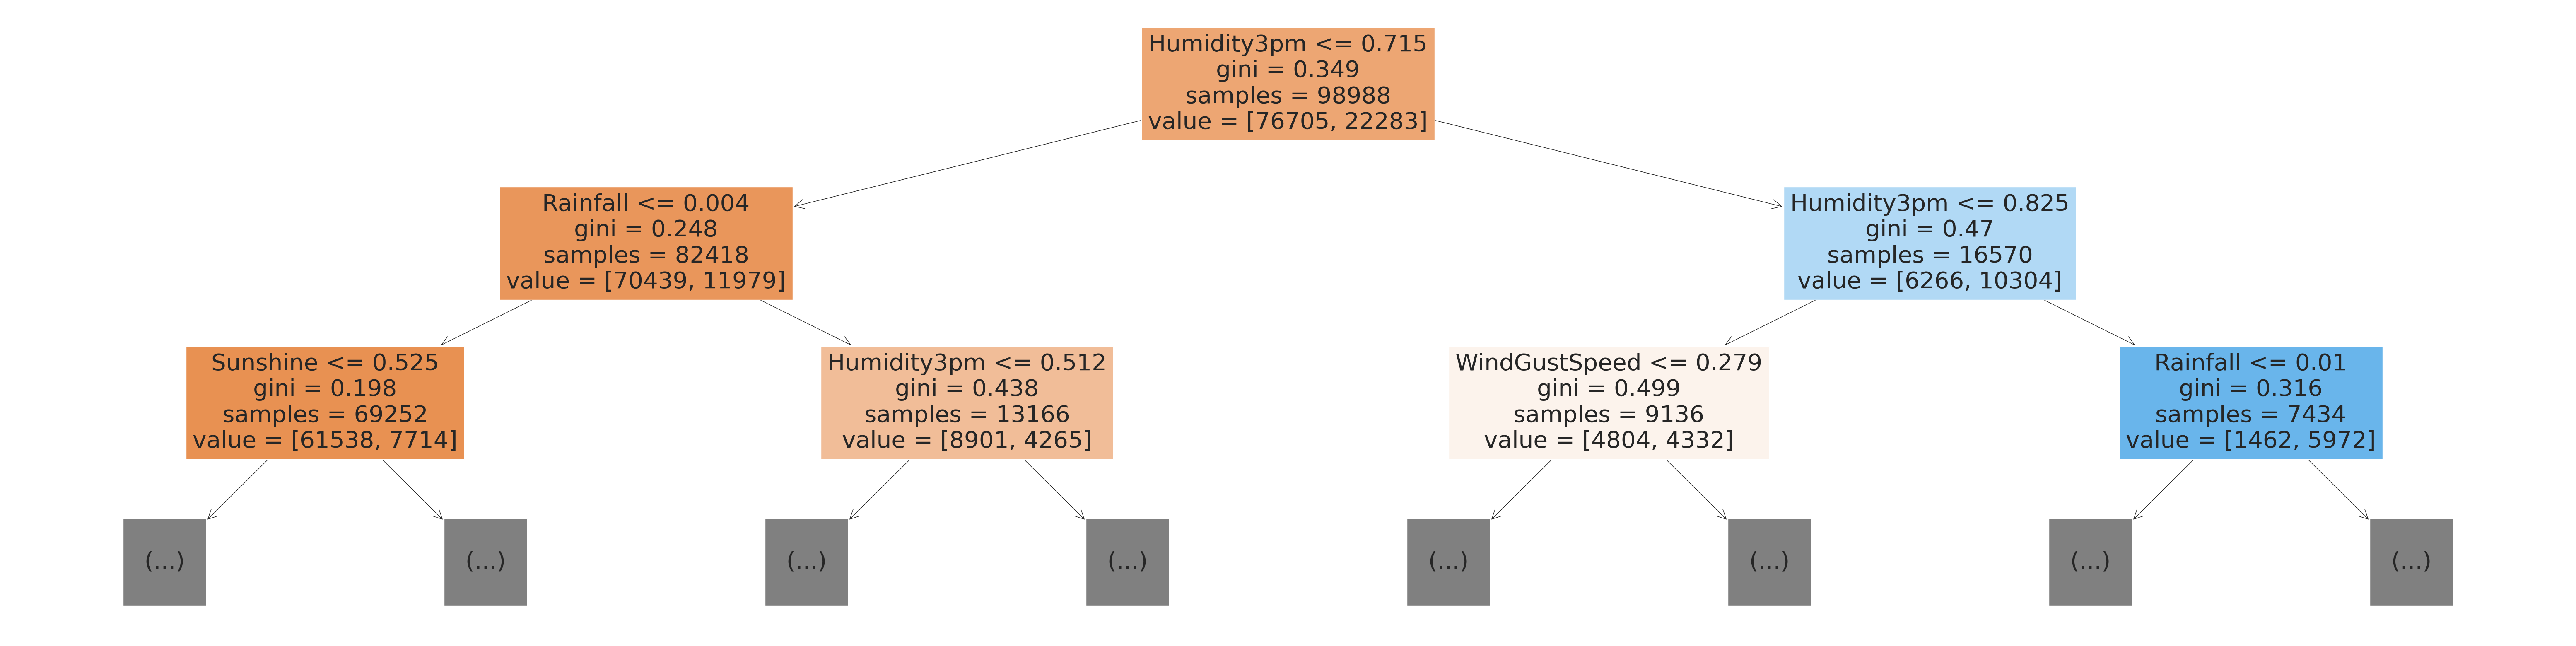

In [ ]:
#tree as a graph
plt.figure(figsize=(80,20))
plot_tree(model,feature_names=X_train.columns,max_depth=2,filled=True)

In [ ]:
model.tree_.max_depth

48

In [ ]:
#tree as text
tree_text=export_text(model,max_depth=10,feature_names=list(X_train.columns))
print(tree_text)

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |--- Location_Watsonia <= 0.50
|   |   |   |   |   |   |   |   |--- Cloud9am <= 0.83
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.07
|   |   |   |   |   |   |   |   |   |   |--- Pressure9am <= 0.47
|   |   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |   |--- Pressure9am >  0.47
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.07
|   |   |   |   |   |   |   |   |   |   |--- MinTemp <= 0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- MinTemp >  0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated

**Feature importance**

In [ ]:
(X_train.columns)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW',
       'WindDir3pm_Unknown', 'WindDir3pm_W', 'WindDir3pm_WNW',
       'WindDir3pm_WSW', 'RainToday_No', 'RainToday_Unknown', 'RainToday_Yes'],
      dtype='object', length=119)

In [ ]:
#importance for each feature or column of training data
(model.feature_importances_)


array([3.43949832e-02, 3.20723744e-02, 5.96978427e-02, 2.39997157e-02,
       4.96970278e-02, 5.52776844e-02, 2.77290154e-02, 2.87896517e-02,
       3.97762378e-02, 2.61665505e-01, 3.38797443e-02, 6.29086081e-02,
       1.41634157e-02, 1.82574107e-02, 3.39304134e-02, 2.99978180e-02,
       2.29983521e-03, 1.97127428e-03, 1.30448300e-03, 7.05458133e-04,
       1.51355792e-03, 1.12862805e-03, 8.66864394e-04, 1.77451768e-03,
       1.21677026e-03, 1.57331930e-03, 8.42954495e-04, 2.05031388e-03,
       1.90637772e-03, 3.26731137e-04, 1.11629763e-03, 1.52431517e-03,
       5.08479231e-04, 8.30004101e-04, 1.48248394e-03, 8.87667861e-04,
       7.61612213e-04, 7.02994607e-04, 1.72668316e-03, 2.07806756e-03,
       3.80229195e-04, 7.64016199e-04, 1.38715756e-03, 1.47491895e-03,
       1.48825382e-03, 8.67028594e-04, 8.33784178e-04, 1.54580309e-03,
       1.09367536e-03, 2.03218887e-03, 8.51581460e-04, 1.79979059e-03,
       9.69639078e-04, 1.28254100e-03, 1.28721925e-03, 3.77018000e-04,
      

**Turning the importance value in DataFrame**

In [ ]:
importance_df=pd.DataFrame({
    'feature':X_train.columns,
    'importance':model.feature_importances_
}).sort_values('importance',ascending=False)


In [ ]:
importance_df.head(34)

,feature,importance
9,Humidity3pm,0.261666
11,Pressure3pm,0.062909
2,Rainfall,0.059698
5,WindGustSpeed,0.055278
4,Sunshine,0.049697
8,Humidity9am,0.039776
0,MinTemp,0.034395
14,Temp9am,0.033930
10,Pressure9am,0.033880
1,MaxTemp,0.032072


<Axes: title={'center': 'Feature Importance'}, xlabel='importance', ylabel='feature'>

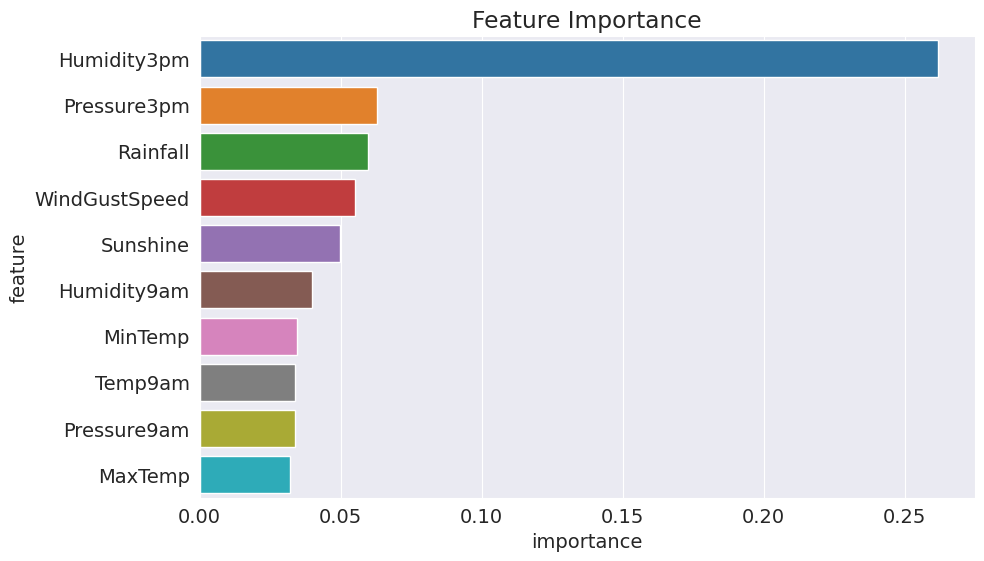

In [ ]:
 plt.title('Feature Importance')
 sns.barplot(data=importance_df.head(10),x='importance',y='feature')

**Hyperparameter Tuning and Overfitting**

The two main hyparameters turned out to be MAX_DEPTH and MAX_LEAF_NODES,let's see that changing max depth will help in reducing overfitting or not

In [ ]:
model=DecisionTreeClassifier(max_depth=3,random_state=42)

In [ ]:
model.fit(X_train,train_targets)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
model.score(X_train,train_targets)

0.8291308037337859

In [ ]:
model.score(X_val,val_targets)

0.8334397307178921

While training accuracy of the model has gone down,the validation accuracy of the model has increased significantly,lets search for the best value of max_depth to reduce overfitting signinficantly

It is found by graphical analysis that max_depth 7 has a good accuarcy over validation set ,Now let's tune max_leaf_nodes to further reduce

In [ ]:
model=DecisionTreeClassifier(max_depth=7,random_state=True).fit(X_train,train_targets)
model.score(X_train,train_targets),model.score(X_val,val_targets)

(0.8466884874934335, 0.8453949277465034)

In [ ]:
model=DecisionTreeClassifier(max_leaf_nodes=2500,random_state=42)

In [ ]:
model.fit(X_train,train_targets)

DecisionTreeClassifier(max_leaf_nodes=2500, random_state=42)

In [ ]:
model.score(X_val,val_targets)

0.833323660843828

In [ ]:
model.score(X_train,train_targets)

0.9192831454317695

In [ ]:
model.tree_.max_depth

26

In [ ]:
def max_depth_error(md):
  model=DecisionTreeClassifier(max_depth=md,random_state=42)
  model.fit(X_train,train_targets)
  train_error = 1 - model.score(X_train,train_targets)
  val_error = 1 - model.score(X_val,val_targets)
  return {'Max Depth':md, 'Training error':train_error,'Validation error':val_error}


In [ ]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1,21)])

CPU times: user 42.7 s, sys: 477 ms, total: 43.2 s
Wall time: 43.3 s


In [ ]:
errors_df

,Max Depth,Training error,Validation error
0,1,0.184315,0.177935
1,2,0.179547,0.172712
2,3,0.170869,0.166560
3,4,0.165707,0.164355
4,5,0.160676,0.159074
5,6,0.156271,0.157275
6,7,0.153312,0.154605
7,8,0.147806,0.157739
8,9,0.140916,0.156578
9,10,0.132966,0.157565


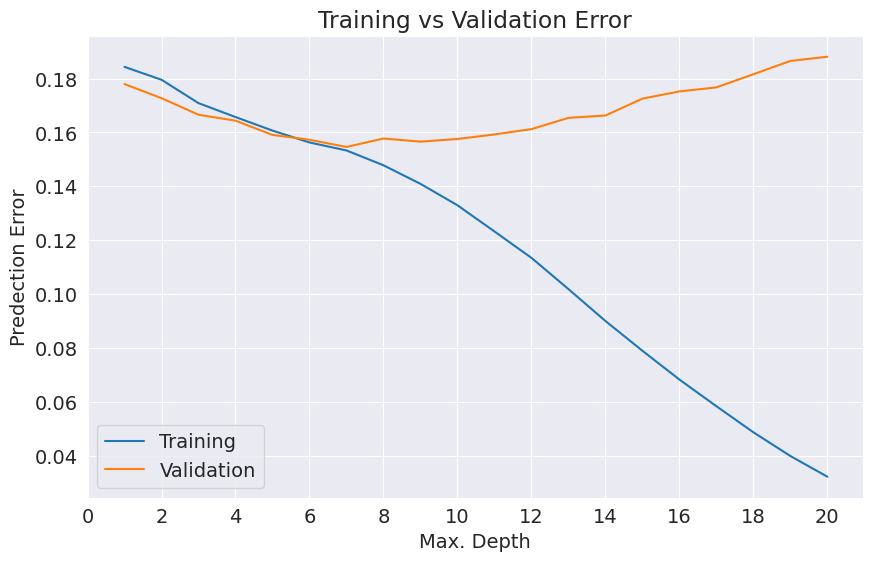

In [ ]:
plt.figure()
plt.plot(errors_df['Max Depth'],errors_df['Training error'])
plt.plot(errors_df['Max Depth'],errors_df['Validation error'])
plt.title('Training vs Validation Error')
plt.xticks(range(0,21,2))
plt.xlabel('Max. Depth')
plt.ylabel('Predection Error')
plt.legend(['Training','Validation'])

We can increase the accuracy using **Random Forest** on both training set and validation set

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
%%time
model= RandomForestClassifier(n_jobs=-1,random_state=42)

CPU times: user 66 µs, sys: 1 µs, total: 67 µs
Wall time: 71 µs


In [ ]:
%%time
model.fit(X_train,train_targets)

CPU times: user 39.2 s, sys: 176 ms, total: 39.4 s
Wall time: 22.9 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
model.score(X_train,train_targets)

0.9999595910615429

In [ ]:
model.score(X_val,val_targets)

0.8559572862863444

So validation accuracy is even higher than the case where we tuned hyperparameters and choose best one for finding accuracy in case of single decision tree

In [ ]:
train_probs=model.predict_proba(X_train)

In [ ]:
train_probs

array([[0.9 , 0.1 ],
       [0.97, 0.03],
       [0.99, 0.01],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.95, 0.05]])

In [ ]:
len(model.estimators_)

100

So there are 100 decision trees in this random forest.Let's plot some decision trees of random forest

[Text(0.5, 0.875, 'RainToday_No <= 0.5\ngini = 0.351\nsamples = 62756\nvalue = [76554, 22434]'),
 Text(0.25, 0.625, 'Cloud3pm <= 0.833\ngini = 0.498\nsamples = 14498\nvalue = [12089, 10685]'),
 Text(0.125, 0.375, 'Humidity3pm <= 0.655\ngini = 0.488\nsamples = 12374\nvalue = [11189, 8220]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'WindSpeed3pm <= 0.414\ngini = 0.392\nsamples = 2124\nvalue = [900, 2465]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'WindGustDir_NNW <= 0.5\ngini = 0.261\nsamples = 48258\nvalue = [64465, 11749]'),
 Text(0.625, 0.375, 'Evaporation <= 0.021\ngini = 0.255\nsamples = 45976\nvalue = [61725, 10890]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Cloud9am <= 0.722\ngini = 0.363\nsamples = 2282\nvalue = [2740, 859]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

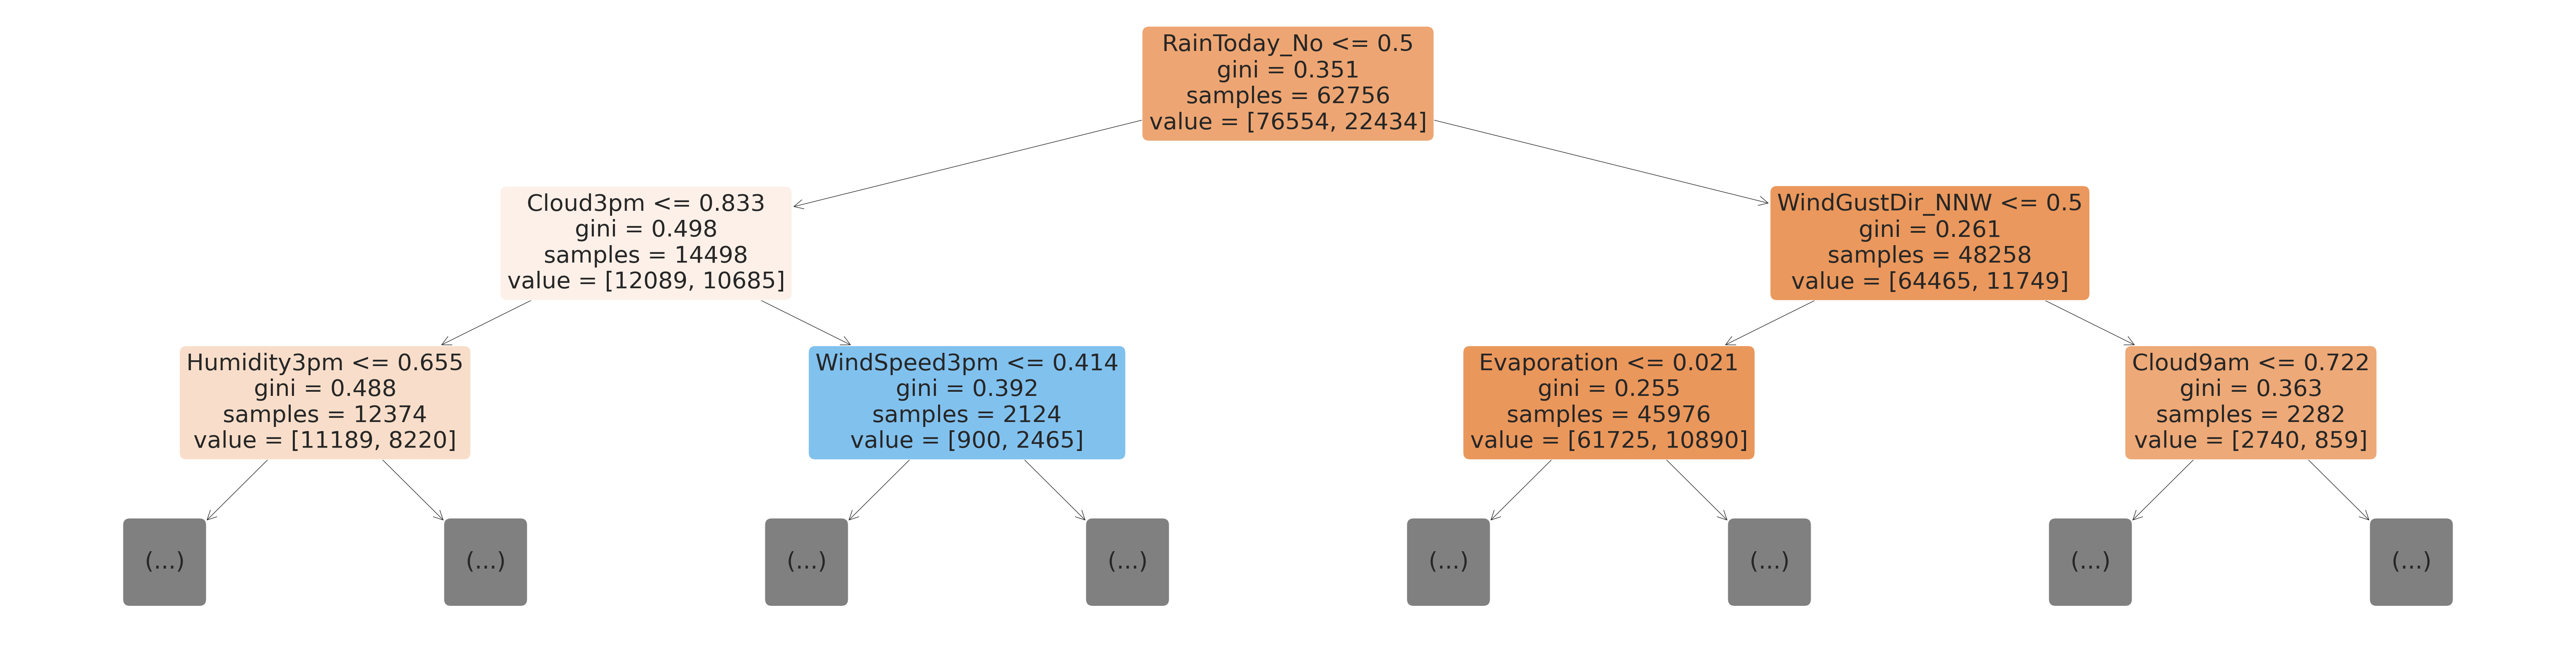

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[1],max_depth=2,feature_names=X_train.columns,filled=True,rounded=True)

[Text(0.5, 0.875, 'WindSpeed9am <= 0.162\ngini = 0.345\nsamples = 62577\nvalue = [77041, 21947]'),
 Text(0.25, 0.625, 'Humidity3pm <= 0.705\ngini = 0.327\nsamples = 50577\nvalue = [63618, 16524]'),
 Text(0.125, 0.375, 'Cloud9am <= 0.524\ngini = 0.227\nsamples = 41880\nvalue = [57729, 8682]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'WindDir3pm_NE <= 0.5\ngini = 0.49\nsamples = 8697\nvalue = [5889, 7842]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Humidity9am <= 0.755\ngini = 0.41\nsamples = 12000\nvalue = [13423, 5423]'),
 Text(0.625, 0.375, 'WindGustSpeed <= 0.38\ngini = 0.313\nsamples = 8949\nvalue = [11364, 2742]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Humidity3pm <= 0.805\ngini = 0.491\nsamples = 3051\nvalue = [2059, 2681]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

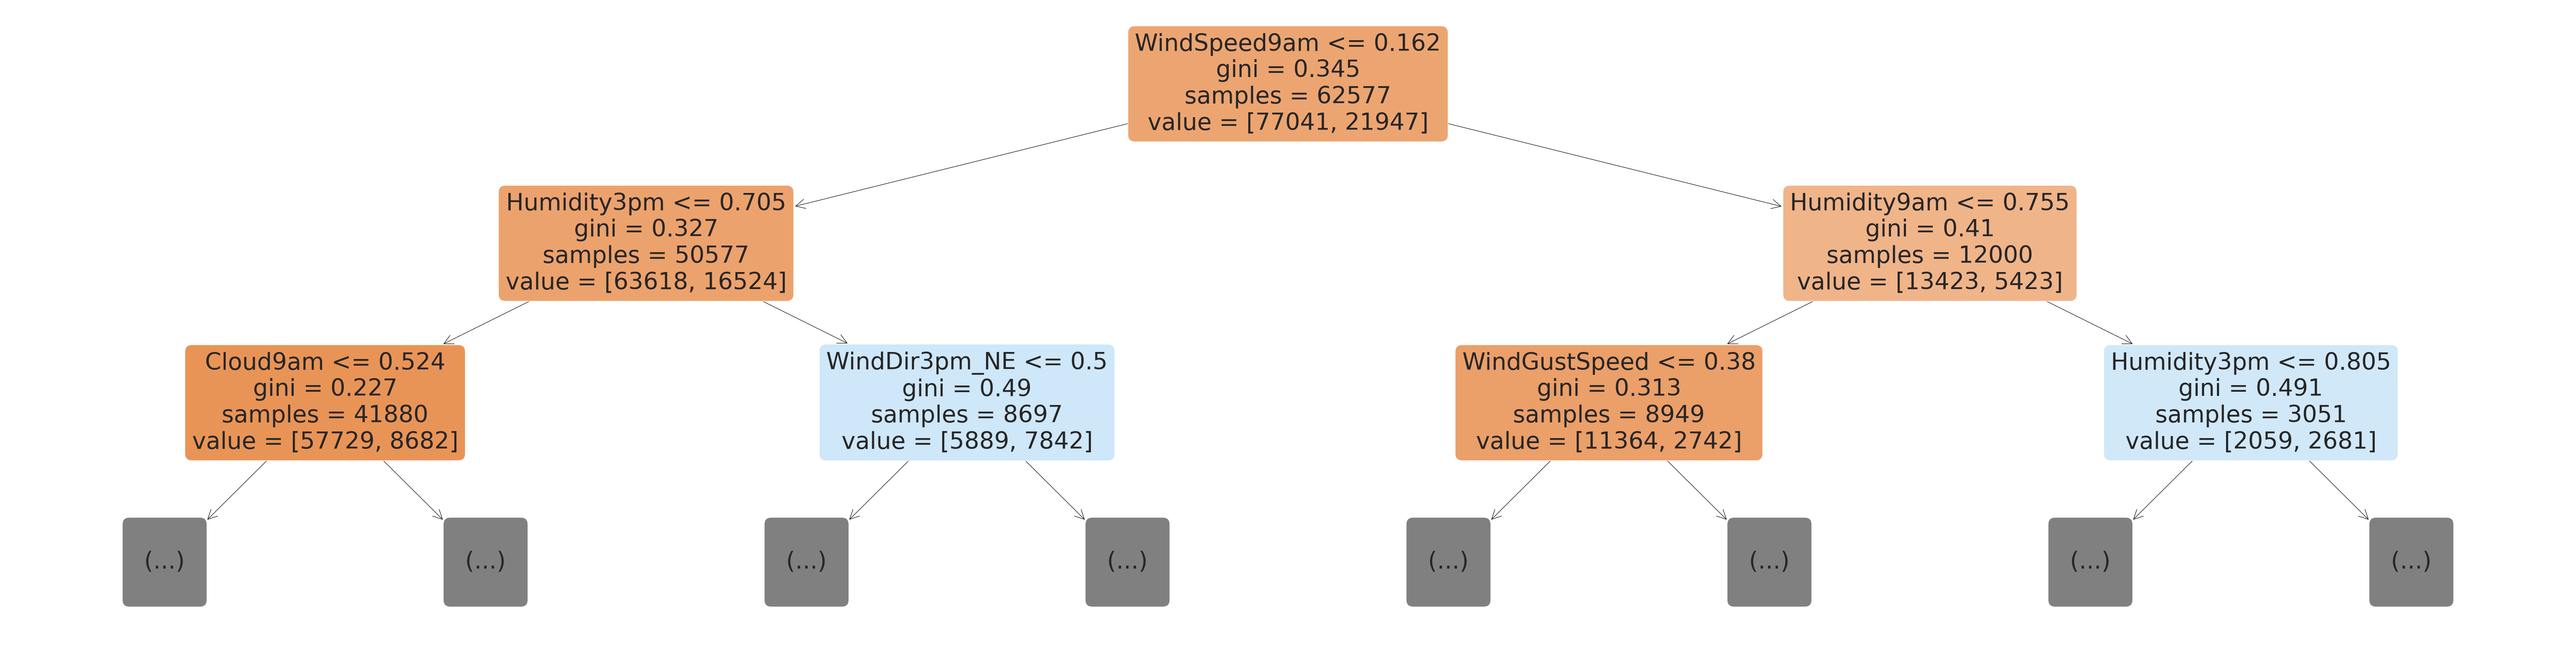

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[10],max_depth=2,feature_names=X_train.columns,filled=True,rounded=True)

Feature Importance

In [ ]:
importance_df=pd.DataFrame({
      'feature':X_train.columns,
      'importance':model.feature_importances_
}).sort_values('importance',ascending=False)

In [ ]:
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.133176
4,Sunshine,0.055553
11,Pressure3pm,0.052976
2,Rainfall,0.050488
10,Pressure9am,0.049379
8,Humidity9am,0.049261
5,WindGustSpeed,0.046640
15,Temp3pm,0.045179
1,MaxTemp,0.042172
0,MinTemp,0.041549


Let's tune some hyperparameters of Random Forests to increase the efficiency of validation set ,for it we first create a base model with which we can compare models with tuned hyperparameters

In [ ]:
base_model=RandomForestClassifier(random_state=42,n_jobs=-1).fit(X_train,train_targets)

In [ ]:
base_train_acc=base_model.score(X_train,train_targets)
base_val_acc=base_model.score(X_val,val_targets)

In [ ]:
base_accs=base_train_acc,base_val_acc
base_accs

(0.9999595910615429, 0.8559572862863444)

We checked accuracy by first tuning no. of decision tree in random forest controlled by n_estimators.By increasing n_estimators we can increase randomness which results in reducing overfitting(Default_value=100)

**10 estimators**

In [ ]:
model=RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators=10)

In [ ]:
model.fit(X_train,train_targets)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [ ]:
model.score(X_train,train_targets),model.score(X_val,val_targets)

(0.9873520022629005, 0.8441761940688295)

In [ ]:
base_accs

(0.9999595910615429, 0.8559572862863444)

**500 estimators**

In [ ]:
model=RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators=300)

In [ ]:
model.fit(X_train,train_targets)

RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)

In [ ]:
model.score(X_train,train_targets),model.score(X_val,val_targets)

(0.9999797955307714, 0.857001915152922)

In [ ]:
base_accs

(0.9999595910615429, 0.8559572862863444)

So in this case,there is very very little increase in validation accuracy as compared to base value so lets try next hyperparameters max_depth and max_leaf_node

In [ ]:
def test_params(**params):
  model=RandomForestClassifier(random_state=42,n_jobs=-1,**params).fit(X_train,train_targets)
  return model.score(X_train,train_targets),model.score(X_val,val_targets)

In [ ]:
test_params(max_depth=26,max_leaf_nodes=2**9)

(0.8639127975108094, 0.8485288143462364)

In [ ]:
base_accs

(0.9999595910615429, 0.8559572862863444)

We can also tune no. of features of our dataset to reduce overfitting

In [ ]:
test_params(max_features=5)

(0.9999595910615429, 0.8549126574197667)

In [ ]:
test_params(max_features=20)

(0.9999494888269285, 0.8575242295862109)

In [ ]:
base_accs

(0.9999595910615429, 0.8559572862863444)

Let see some more hyperparametrs that can be tuned

In [ ]:
test_params(min_samples_split=3,min_samples_leaf=2)

(0.9626419363963309, 0.8556671116011839)

In [ ]:
test_params(min_impurity_decrease=1e-7,bootstrap=False)

(0.9999797955307714, 0.8588590331379491)

In [ ]:
test_params(max_samples=0.7)

(0.9951610296197518, 0.8542162381753816)

In [ ]:
test_params(class_weight='balanced')

(0.9999494888269285, 0.8556671116011839)

In [ ]:
test_params(class_weight={'No':1,'Yes':2})

(0.9999292843576999, 0.8565376356566653)

We can find the optimal values of hyperparametrs by plotting graph for all hyperparametrs vs errors like we did for decision tree to use them to find best possible accuracy


In [ ]:
model=RandomForestClassifier(
    n_estimators=500,
    random_state=42,
    n_jobs=-1,
    max_depth=30,
    class_weight={'No': 1,'Yes': 1.5}

    )

In [ ]:
model.fit(X_train,train_targets)

RandomForestClassifier(class_weight={'No': 1, 'Yes': 1.5}, max_depth=30,
                       n_estimators=500, n_jobs=-1, random_state=42)

In [ ]:
model.score(X_train,train_targets),model.score(X_val,val_targets)

(0.9967571826888108, 0.8572920898380825)

• Learn about  supervised learning algorithms such as Linear Regression, Logistic Regression, Decision Trees ,Neural Networks,etc.

